In [13]:
# Problem 1

In [1]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# Parameters
n = 20
d = 25
d_range = range(1, 7, 1)
sigma_range = [0.05, 0.3, 0.5, 0.8, 1]
sigma_x = 1
n_test = 100
n_sims = 500
np.random.seed(5)
beta = np.linspace(0.5, 1, d)

In [3]:
def generate_data_polynomial(n, d, sigma, sigma_x, beta):
    x_base = sigma_x * np.random.rand(n)
    X = [x_base ** i for i in range(1, d + 1)]
    X = np.column_stack(X)
    eps = sigma * np.random.randn(n)
    Y = X @ beta + eps
    return X, Y

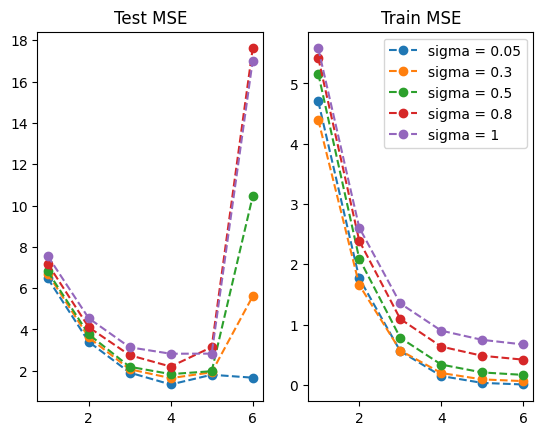

In [12]:
model = LinearRegression()
mse_test, mse_train = dict(), dict()

for d_fit in d_range:
    for sigma in sigma_range:
        mse_test[(d_fit, sigma)] = np.empty(n_sims)
        mse_train[(d_fit, sigma)] = np.empty(n_sims)

for s in range(n_sims):
    for sigma in sigma_range:
        X_train, Y_train = generate_data_polynomial(n, d, sigma, sigma_x, beta)
        for d_fit in d_range:
            model.fit(X_train[:, :d_fit], Y_train)
            X_test, Y_test = generate_data_polynomial(n_test, d, sigma, sigma_x, beta)
            Y_pred = model.predict(X_test[:, :d_fit])
            mse_test[(d_fit, sigma)][s] = mean_squared_error(Y_test, Y_pred)
            Y_pred = model.predict(X_train[:, :d_fit])
            mse_train[(d_fit, sigma)][s] = mean_squared_error(Y_train, Y_pred)

fig, (ax_test, ax_train) = plt.subplots(1, 2)
for sigma in sigma_range:
    for d_fit in d_range:
        mse_test[(d_fit, sigma)] = np.mean(mse_test[(d_fit, sigma)])
        mse_train[(d_fit, sigma)] = np.mean(mse_train[(d_fit, sigma)])
    ax_test.plot(d_range, [mse_test[(d_fit, sigma)] for d_fit in d_range],
                 linestyle = '--', marker = 'o',
                 label = 'sigma = ' + str(sigma))
    ax_train.plot(d_range, [mse_train[(d_fit, sigma)] for d_fit in d_range],
                 linestyle = '--', marker = 'o',
                 label = 'sigma = ' + str(sigma))

ax_test.title.set_text('Test MSE')
ax_train.title.set_text('Train MSE')
plt.legend()
plt.show()

In [14]:
# Problem 2

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.metrics import mean_squared_error
from scipy import stats

>>>>>> Random Seed: 1


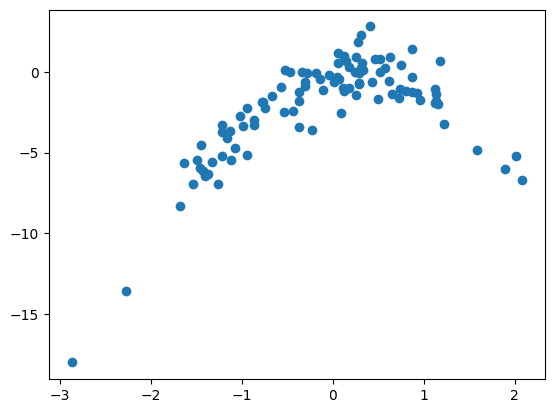

p = 1 , test MSE (CV) = 7.185438964132535
p-values = ['1.00', '0.00']
p = 2 , test MSE (CV) = 1.2424249825774796
p-values = ['1.00', '0.00', '0.00']
p = 3 , test MSE (CV) = 1.2116042381521361
p-values = ['1.00', '0.00', '0.00', '0.10']
p = 4 , test MSE (CV) = 1.2439135053557595
p-values = ['1.00', '0.00', '0.00', '0.37', '0.75']
>>>>>> Random Seed: 2


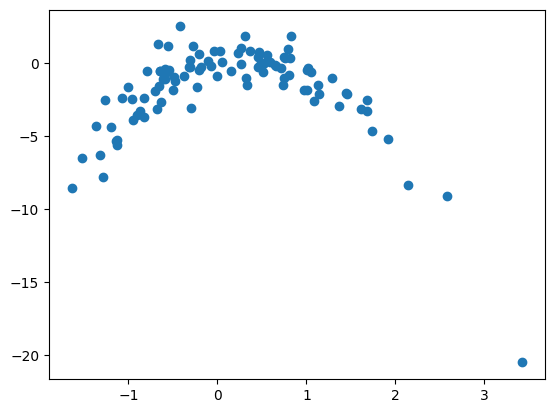

p = 1 , test MSE (CV) = 10.046002959546982
p-values = ['1.00', '0.16']
p = 2 , test MSE (CV) = 1.256323704165634
p-values = ['1.00', '0.00', '0.00']
p = 3 , test MSE (CV) = 1.4059789597643466
p-values = ['1.00', '0.00', '0.00', '0.32']
p = 4 , test MSE (CV) = 1.3518419518928855
p-values = ['1.00', '0.00', '0.00', '0.10', '0.17']


In [16]:
n = 100
model = LinearRegression()

for seed in [1,2]:
    np.random.default_rng(seed)
    print(">>>>>> Random Seed: " + str(seed))
    x = np.random.normal(size=n)
    y = x - 2 * x**2 + np.random.normal(size=n)
    plt.scatter(x, y)
    plt.show()
    
    for p in range(1,5):
        xp = np.transpose([x**i for i in range(0,p+1)])
# Compute LOOCV MSE:
        cv = cross_validate(model, xp, y, cv=n, scoring='neg_mean_squared_error', return_train_score=True)
# Calculate standard errors:
        model.fit(xp,y)
        mse = mean_squared_error(y, model.predict(xp))
        se = np.sqrt(np.diag(np.linalg.inv(np.dot(xp.T, xp))) * mse)
# Calculate p-values:
        t_stats = model.coef_ / se
        p_values = [2 * (1 - stats.t.cdf(np.abs(t), n-p)) for t in t_stats]
        print('p =', p, ', test MSE (CV) =', -np.mean(cv['test_score']))
        print('p-values = ' + str([f"{p_val:.2f}" for p_val in p_values]))